It is difficult to compare human rater data with machine learning outcomes, the human rater data has much more ratings, while the machine learning data only has one rating per item.


In [1]:
import pandas as pd
import os

import numpy as np

import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
from nexa_py_sentimotion_mapper.sentimotion_mapper import Mapper

In [3]:
from constants import ROOT_DIR

In [4]:
path = os.path.join(ROOT_DIR, "data/out/multimodal_results.csv")

df = pd.read_csv(path)
print(df.shape)
df.head()

(576, 3)


,condition,y,y_pred
0,furhat_audio_,29,29
1,furhat_audio_,3,2
2,furhat_audio_,37,37
3,furhat_audio_,26,37
4,furhat_audio_,1,2


In [7]:
df["accurate"] = df["y"] == df["y_pred"]
df["emotion"] = df["y"].map(Mapper.get_emotion_from_id)
df.head()

,condition,y,y_pred,accurate,emotion
0,furhat_audio_,29,29,True,interest_curiosity
1,furhat_audio_,3,2,False,doubt
2,furhat_audio_,37,37,True,disappointment
3,furhat_audio_,26,37,False,boredom
4,furhat_audio_,1,2,False,confusion


In [5]:
df["condition"].unique()

array(['furhat_audio_', 'metahuman_audio_', 'original_audio_',
       'furhat_video', 'metahuman_video', 'original_video',
       'furhat_audio_video', 'metahuman_audio_video',
       'original_audio_video'], dtype=object)

In [8]:
conditions = ['original_video', 'metahuman_video', 'furhat_video']

for c in conditions:
    print("\nCondition:", c)
    df_c = df[df["condition"] == c]

    # Group the DataFrame by 'emotion_id' and calculate the accuracy for each ID
    accuracy_by_emotion = df_c.groupby('emotion')['accurate'].mean().reset_index()

    # Rename the columns for clarity
    accuracy_by_emotion.columns = ['emotion', 'accuracy']

    # Print or plot the accuracy results
    print(accuracy_by_emotion.sort_values(by='accuracy', ascending=False))


Condition: original_video
              emotion  accuracy
0             boredom     0.875
1       concentration     0.750
2           confusion     0.750
5               doubt     0.750
3       determination     0.625
6           gratitude     0.625
4      disappointment     0.375
7  interest_curiosity     0.375

Condition: metahuman_video
              emotion  accuracy
1       concentration     0.375
2           confusion     0.375
4      disappointment     0.375
0             boredom     0.250
5               doubt     0.250
6           gratitude     0.125
3       determination     0.000
7  interest_curiosity     0.000

Condition: furhat_video
              emotion  accuracy
3       determination     0.375
0             boredom     0.250
2           confusion     0.250
1       concentration     0.125
4      disappointment     0.125
5               doubt     0.125
6           gratitude     0.125
7  interest_curiosity     0.125


In [10]:
accuracy_results = {}

# Compute accuracy for each condition
for c in conditions:
    df_c = df[df["condition"] == c]
    accuracy_by_emotion = df_c.groupby('emotion')['accurate'].mean()
    accuracy_results[c] = accuracy_by_emotion  # Store results in dictionary

# Convert to DataFrame for easy comparison
accuracy_df = pd.DataFrame(accuracy_results)

# Calculate performance drop relative to 'original_video_' (assumed baseline)
baseline = accuracy_df['original_video']
performance_drop = accuracy_df.sub(baseline, axis=0)  # Subtract baseline from all conditions

performance_drop

,original_video,metahuman_video,furhat_video
emotion,,,
boredom,0.0,-0.625,-0.625
concentration,0.0,-0.375,-0.625
confusion,0.0,-0.375,-0.500
determination,0.0,-0.625,-0.250
disappointment,0.0,0.000,-0.250
doubt,0.0,-0.500,-0.625
gratitude,0.0,-0.500,-0.500
interest_curiosity,0.0,-0.375,-0.250


Note that the performance drop is bigger here compared to the human evaluation, this is because ML results are superior for original compared to human raters, the transfer slightly worse.

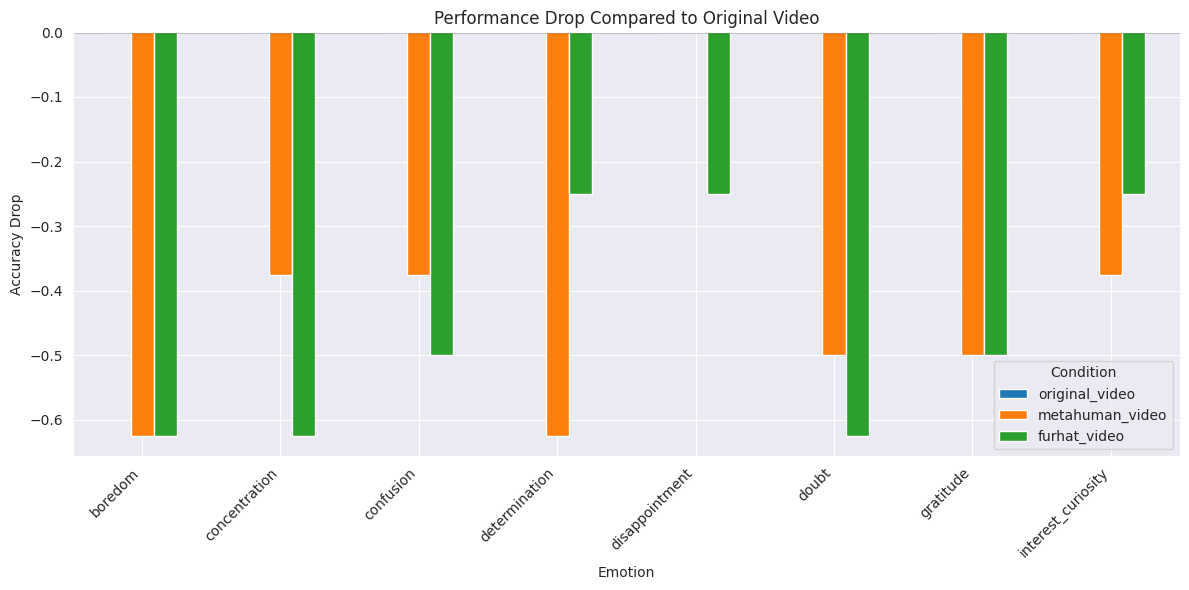

In [11]:
# Plot performance drop as a bar chart
performance_drop.plot(kind='bar', figsize=(12, 6))

# Formatting
plt.axhline(0, color='black', linewidth=1)  # Add a horizontal line at 0 for reference
plt.xticks(rotation=45, ha='right')
plt.title("Performance Drop Compared to Original Video")
plt.ylabel("Accuracy Drop")
plt.xlabel("Emotion")
plt.legend(title="Condition", loc="best")
plt.tight_layout()

# Show plot
plt.show()